In [10]:
# Programa para leer el archivo de texto.

def leer_posiciones(filename):
    posiciones = []  # Lista para almacenar las posiciones de cada paso temporal

    with open(filename, 'r') as file:
        paso_actual = []  # Lista temporal para almacenar las posiciones de un paso temporal

        for linea in file:
            linea = linea.strip()
            if linea:  # Si la línea no está vacía
                datos = linea.split(",")  # Dividimos por coma
                r1x, r1y = float(datos[0]), float(datos[1])  # Tomamos las dos primeras columnas
                paso_actual.append((r1x, r1y))
            else:  # Si encontramos una línea vacía, significa que termina un paso temporal
                if paso_actual:  # Si hay datos en el paso actual
                    posiciones.append(paso_actual)
                    paso_actual = []  # Reiniciamos para el siguiente paso temporal

        # Añadimos el último paso si no está vacío
        if paso_actual:
            posiciones.append(paso_actual)

    return posiciones

C:\Users\diego\AppData\Local\Temp\ipykernel_21316\2669728573.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


Video guardado como 'simulacion.mp4'.


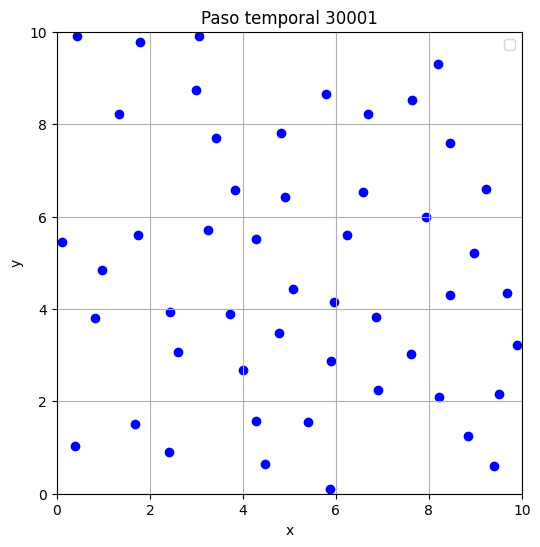

In [11]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.animation as animation

# Función para leer las posiciones
def leer_posiciones(filename):
    posiciones = []  # Lista para almacenar las posiciones de cada paso temporal

    with open(filename, 'r') as file:
        paso_actual = []  # Lista temporal para almacenar las posiciones de un paso temporal

        for linea in file:
            linea = linea.strip()
            if linea:  # Si la línea no está vacía
                datos = linea.split(",")  # Dividimos por coma
                r1x, r1y = float(datos[0]), float(datos[1])  # Tomamos las dos primeras columnas
                paso_actual.append((r1x, r1y))
            else:  # Si encontramos una línea vacía, significa que termina un paso temporal
                if paso_actual:  # Si hay datos en el paso actual
                    posiciones.append(paso_actual)
                    paso_actual = []  # Reiniciamos para el siguiente paso temporal

        # Añadimos el último paso si no está vacío
        if paso_actual:
            posiciones.append(paso_actual)

    return posiciones

# Función para crear la animación
def crear_animacion(posiciones, caja_lado=10, intervalo=10, guardar_gif=False, guardar_video=False):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(0, caja_lado)
    ax.set_ylim(0, caja_lado)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("Simulación de partículas")
    scatter = ax.scatter([], [], c='blue')
    ax.legend()
    ax.grid(True)

    # Función para actualizar los datos en cada frame
    def actualizar(frame):
        paso = posiciones[frame]
        x = [pos[0] for pos in paso]
        y = [pos[1] for pos in paso]
        scatter.set_offsets(list(zip(x, y)))
        ax.set_title(f"Paso temporal {frame + 1}")

    # Crear la animación
    anim = FuncAnimation(fig, actualizar, frames=len(posiciones), interval=intervalo)

    # Guardar como GIF si se solicita
    if guardar_gif:
        gif_writer = PillowWriter(fps=1000 // intervalo)
        anim.save("simulacion.gif", writer=gif_writer)
        print("GIF guardado como 'simulacion.gif'.")

    # Guardar como video si se solicita
    if guardar_video:
        video_writer = animation.FFMpegWriter(fps=1000 // intervalo)
        anim.save("simulacion.mp4", writer=video_writer)
        print("Video guardado como 'simulacion.mp4'.")

    plt.show()

# Ejemplo de usoj
if __name__ == "__main__":
    archivo = "SALIDA.txt"  # Nombre del archivo de salida generado por el programa en C
    posiciones = leer_posiciones(archivo)

    # Crear la animación
    # Cambia guardar_gif o guardar_video a True si deseas guardar la animación
    crear_animacion(posiciones, caja_lado=10, intervalo=10, guardar_gif=False, guardar_video=True)

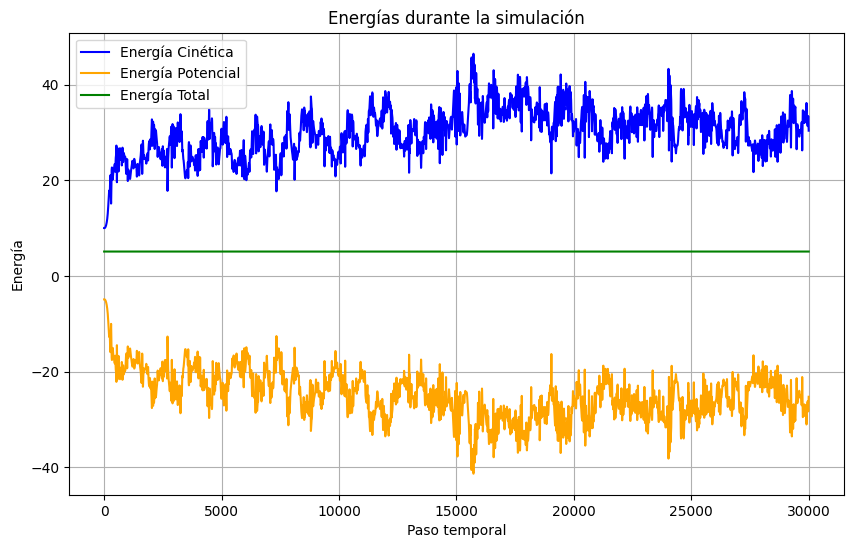

In [28]:
import matplotlib.pyplot as plt

# Función para leer los datos de energía desde el archivo
def leer_energia(filename):
    energia_cinetica = []
    energia_potencial = []
    energia_total = []

    with open(filename, 'r') as file:
        for linea in file:
            datos = linea.strip().split(",")
            if len(datos) == 3:  # Asegurarse de que haya tres columnas
                energia_cinetica.append(float(datos[0]))
                energia_potencial.append(float(datos[1]))
                energia_total.append(float(datos[2]))

    return energia_cinetica, energia_potencial, energia_total

# Función para graficar las energías
def graficar_energias(energia_cinetica, energia_potencial, energia_total):
    pasos = range(len(energia_cinetica))  # Eje x: pasos temporales

    plt.figure(figsize=(10, 6))
    plt.plot(pasos, energia_cinetica, label="Energía Cinética", color="blue")
    plt.plot(pasos, energia_potencial, label="Energía Potencial", color="orange")
    plt.plot(pasos, energia_total, label="Energía Total", color="green")
    plt.xlabel("Paso temporal")
    plt.ylabel("Energía")
    plt.title("Energías durante la simulación")
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejemplo de uso
if __name__ == "__main__":
    archivo = "energia.txt"  # Nombre del archivo de energía
    energia_cinetica, energia_potencial, energia_total = leer_energia(archivo)

    # Graficar las energías
    graficar_energias(energia_cinetica, energia_potencial, energia_total)

KeyboardInterrupt: 

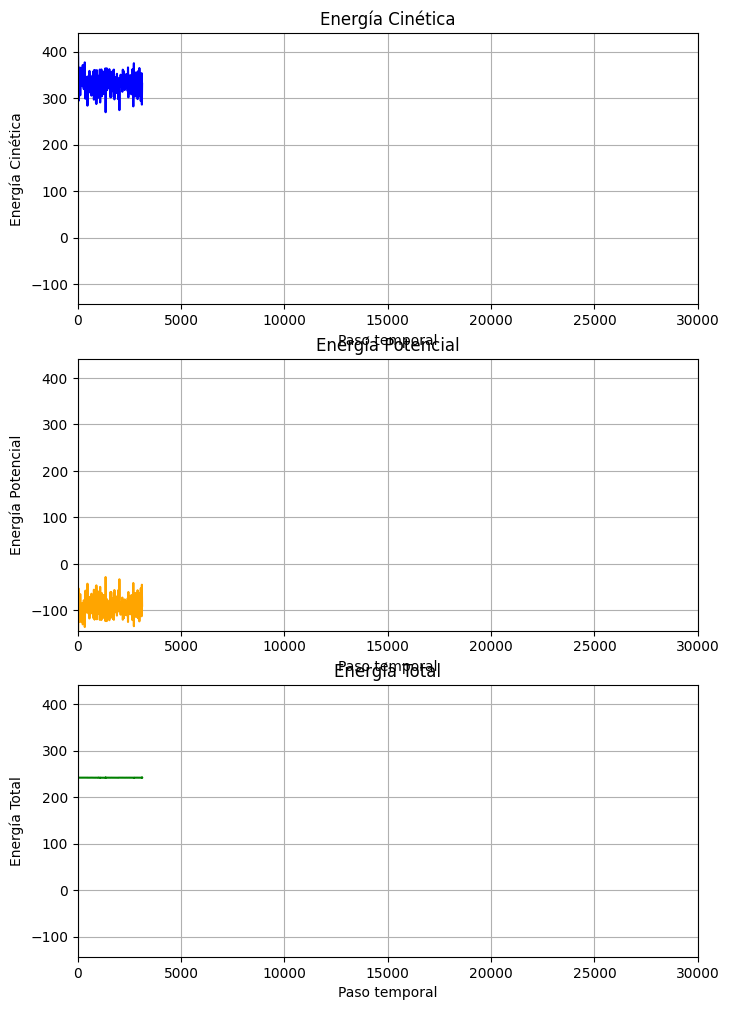

In [24]:
###SI QUIERES ANIMACIÓN DE ENERGÍA###


import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter

# Función para leer los datos de energía desde el archivo
def leer_energia(filename):
    energia_cinetica = []
    energia_potencial = []
    energia_total = []

    with open(filename, 'r') as file:
        for linea in file:
            datos = linea.strip().split(",")
            if len(datos) == 3:  # Asegurarse de que haya tres columnas
                energia_cinetica.append(float(datos[0]))
                energia_potencial.append(float(datos[1]))
                energia_total.append(float(datos[2]))

    return energia_cinetica, energia_potencial, energia_total

# Función para crear la animación
def crear_animacion_energia(energia_cinetica, energia_potencial, energia_total, intervalo=100, guardar_video=True):
    fig, axs = plt.subplots(3, 1, figsize=(8, 12))

    # Configuración de los subplots
    axs[0].set_title("Energía Cinética")
    axs[0].set_xlabel("Paso temporal")
    axs[0].set_ylabel("Energía Cinética")
    axs[0].grid(True)

    axs[1].set_title("Energía Potencial")
    axs[1].set_xlabel("Paso temporal")
    axs[1].set_ylabel("Energía Potencial")
    axs[1].grid(True)

    axs[2].set_title("Energía Total")
    axs[2].set_xlabel("Paso temporal")
    axs[2].set_ylabel("Energía Total")
    axs[2].grid(True)

    # Líneas para los gráficos
    line1, = axs[0].plot([], [], label="Energía Cinética", color="blue")
    line2, = axs[1].plot([], [], label="Energía Potencial", color="orange")
    line3, = axs[2].plot([], [], label="Energía Total", color="green")

    # Función para inicializar los gráficos
    def init():
        for ax in axs:
            ax.set_xlim(0, len(energia_cinetica))
            ax.set_ylim(min(min(energia_cinetica), min(energia_potencial), min(energia_total)) * 0.9,
                        max(max(energia_cinetica), max(energia_potencial), max(energia_total)) * 1.1)
        return line1, line2, line3

    # Función para actualizar los gráficos en cada frame
    def actualizar(frame):
        x = list(range(frame + 1))
        line1.set_data(x, energia_cinetica[:frame + 1])
        line2.set_data(x, energia_potencial[:frame + 1])
        line3.set_data(x, energia_total[:frame + 1])
        return line1, line2, line3

    # Crear la animación
    anim = FuncAnimation(fig, actualizar, frames=len(energia_cinetica), init_func=init, interval=intervalo, blit=True)

    # Guardar como video si se solicita
    if guardar_video:
        video_writer = FFMpegWriter(fps=1000 // intervalo)
        anim.save("energia_animacion.mp4", writer=video_writer)
        print("Video guardado como 'energia_animacion.mp4'.")

    plt.show()

# Ejemplo de uso
if __name__ == "__main__":
    archivo = "energia.txt"  # Nombre del archivo de energía
    energia_cinetica, energia_potencial, energia_total = leer_energia(archivo)

    # Crear la animación
    crear_animacion_energia(energia_cinetica, energia_potencial, energia_total, intervalo=10, guardar_video=True)

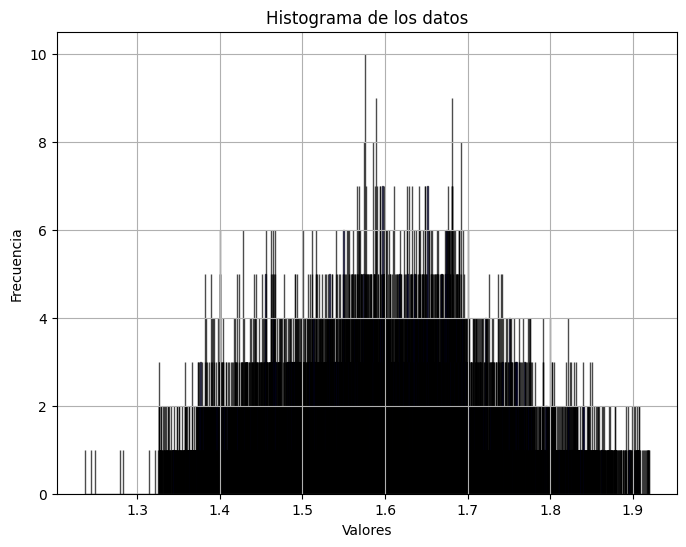

In [29]:
import matplotlib.pyplot as plt

# Función para leer los datos del archivo histograma.txt
def leer_datos_histograma(filename):
    datos = []
    with open(filename, 'r') as file:
        for linea in file:
            datos.append(float(linea.strip()))  # Convertir cada línea en un número flotante
    return datos

# Función para graficar el histograma
def graficar_histograma(datos):
    plt.figure(figsize=(8, 6))
    plt.hist(datos, bins=len(datos), color='blue', edgecolor='black', alpha=0.7)  # bins igual al número de datos
    plt.xlabel('Valores')
    plt.ylabel('Frecuencia')
    plt.title('Histograma de los datos')
    plt.grid(True)
    plt.show()

# Ejemplo de uso
if __name__ == "__main__":
    archivo = "histograma.txt"  # Nombre del archivo
    datos = leer_datos_histograma(archivo)
    graficar_histograma(datos)

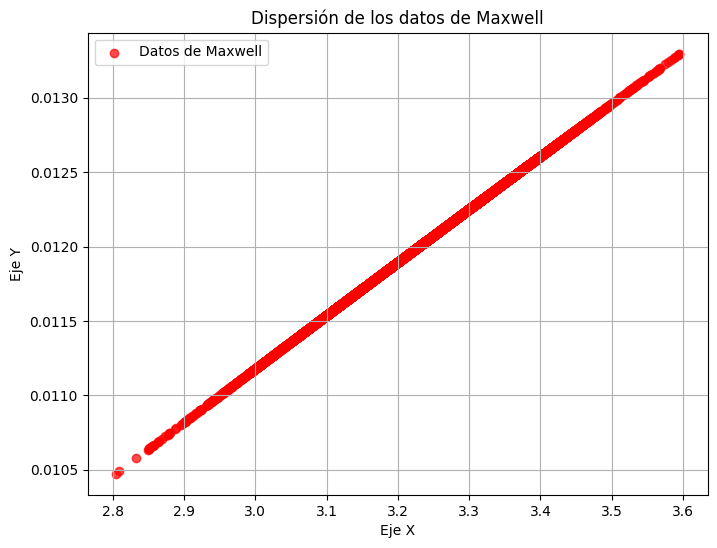

In [23]:
import matplotlib.pyplot as plt

# Función para leer los datos del archivo maxwell.txt
def leer_datos_maxwell(filename):
    x = []
    y = []
    with open(filename, 'r') as file:
        for linea in file:
            datos = linea.strip().split()  # Dividir por espacios
            if len(datos) == 2:  # Asegurarse de que haya dos columnas
                x.append(float(datos[0]))  # Primera columna: eje X
                y.append(float(datos[1]))  # Segunda columna: eje Y
    return x, y

# Función para graficar los datos de dispersión
def graficar_dispersión_maxwell(x, y):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='red', alpha=0.7, label='Datos de Maxwell')
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title('Dispersión de los datos de Maxwell')
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejemplo de uso
if __name__ == "__main__":
    archivo_maxwell = "maxwell.txt"  # Nombre del archivo de la curva de distribución

    # Leer los datos
    x, y = leer_datos_maxwell(archivo_maxwell)

    # Graficar los datos de dispersión
    graficar_dispersión_maxwell(x, y)

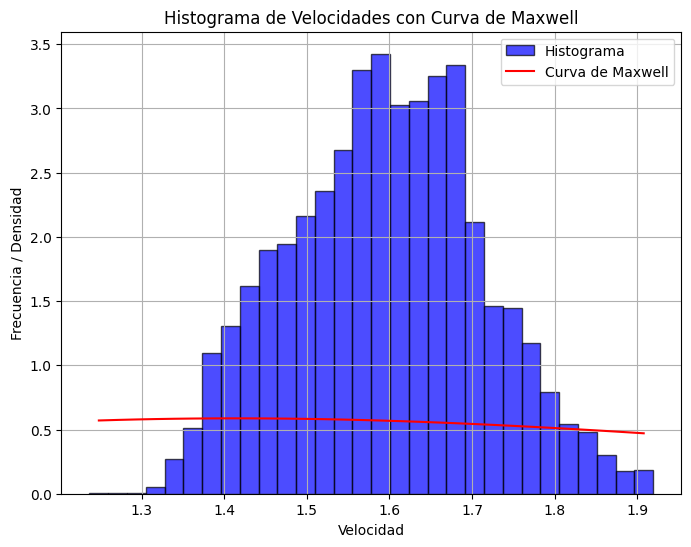

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Función para leer los datos del archivo histograma.txt
def leer_datos_histograma(filename):
    datos = []
    with open(filename, 'r') as file:
        for linea in file:
            datos.append(float(linea.strip()))  # Convertir cada línea en un número flotante
    return datos

# Función para graficar el histograma y superponer una curva de Maxwell
def graficar_histograma_con_curva(datos_histograma, curva_funcion=None):
    plt.figure(figsize=(8, 6))

    # Graficar el histograma normalizado
    conteo, bins, _ = plt.hist(datos_histograma, bins=30, density=True, color='blue', edgecolor='black', alpha=0.7, label='Histograma')

    # Calcular el centro de cada barra del histograma
    bins_centro = (bins[:-1] + bins[1:]) / 2

    # Graficar la curva de Maxwell si se proporciona una función
    if curva_funcion:
        curva = curva_funcion(bins_centro)
        plt.plot(bins_centro, curva, color='red', label='Curva de Maxwell')

    # Personalización del gráfico
    plt.xlabel('Velocidad')
    plt.ylabel('Frecuencia / Densidad')
    plt.title('Histograma de Velocidades con Curva de Maxwell')
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejemplo de uso
if __name__ == "__main__":
    archivo_histograma = "histograma.txt"  # Nombre del archivo del histograma

    # Leer los datos
    datos_histograma = leer_datos_histograma(archivo_histograma)

    # Definir la función para la curva de distribución de Maxwell
    def curva_maxwell(v):
        T = 1.0  # Temperatura (puedes ajustar este valor según sea necesario)
        m = 1.0  # Masa de las partículas (puedes ajustar este valor según sea necesario)
        k_B = 1.0  # Constante de Boltzmann (puedes ajustar este valor según sea necesario)
        factor = np.sqrt((m / (2 * np.pi * k_B * T)) ** 3)
        return factor * 4 * np.pi * v**2 * np.exp(-m * v**2 / (2 * k_B * T))

    # Graficar el histograma con la curva de Maxwell
    graficar_histograma_con_curva(datos_histograma, curva_funcion=curva_maxwell)